In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score
from scipy.stats import chi2_contingency
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
from sklearn.pipeline import Pipeline
import pandas as pd 
import math
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier

In [69]:
df = pd.read_csv('Total DB of Songs.csv')
df.head()

,Unnamed: 0,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence
0,0,1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.0158,0.617,216270,0.872,0.112000,8.0,0.4080,-12.305,1.0,0.0480,111.458,4.0,0.504
1,1,6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.0142,0.825,237120,0.743,0.000021,2.0,0.2370,-5.995,1.0,0.1490,127.045,4.0,0.800
2,2,70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.5600,0.677,312533,0.665,0.000001,7.0,0.3380,-5.171,1.0,0.0305,74.981,4.0,0.706
3,3,1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.5680,0.683,233400,0.728,0.000051,9.0,0.0384,-8.920,1.0,0.2590,75.311,4.0,0.833
4,4,72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.6750,0.319,448720,0.627,0.000073,0.0,0.2890,-9.611,1.0,0.0687,85.818,4.0,0.497


In [70]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212176 entries, 0 to 1212175
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1212176 non-null  object 
 1   Title             1212176 non-null  object 
 2   Artist(s)         1212151 non-null  object 
 3   Acousticness      1212176 non-null  float64
 4   Danceability      1212176 non-null  float64
 5   Duration (ms)     1212176 non-null  int64  
 6   Energy            1212176 non-null  float64
 7   Instrumentalness  1212176 non-null  float64
 8   Key               1212176 non-null  float64
 9   Liveness          1212176 non-null  float64
 10  Loudness          1212176 non-null  float64
 11  Mode              1212176 non-null  float64
 12  Speechiness       1212176 non-null  float64
 13  BPM               1212176 non-null  float64
 14  Time_Signature    1212176 non-null  float64
 15  Valence           1212176 non-null  float64
dtype

In [71]:
df_hits = pd.read_csv('top_10000_1960-now.csv')
df_hits['Track URI'] = df_hits['Track URI'].map(lambda x: x[14:])
df['is_hit'] = df['id'].isin(df_hits['Track URI'])
df['is_hit'].value_counts()

is_hit
False    1202779
True        9397
Name: count, dtype: int64

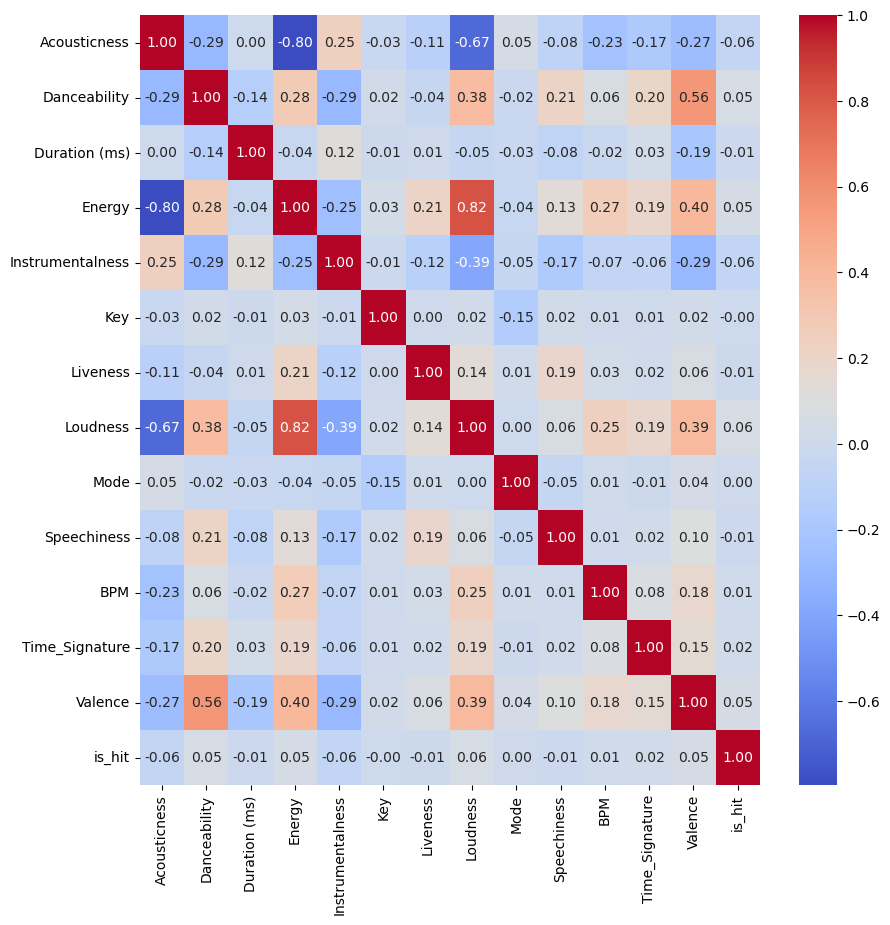

In [72]:
metrics = df.drop(['id', 'Title', 'Artist(s)'], axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(metrics.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [73]:
df_non_hit = df[~df['is_hit']]
df_non_hit_sample = df_non_hit.sample(n=5*(len(df) - len(df_non_hit)), random_state=42)
df_non_hit_sample

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,is_hit
452936,2O7ni8UdnvHlMn8fkq4XZe,Wila,"['Tré', "" 'Bernhard Bamert"", "" 'Lukas Mantel"",...",0.969000,0.4340,224733,0.0214,0.029000,8.0,0.117,-24.059,1.0,0.0369,73.728,5.0,0.0375,False
182389,3YwNMSY18nCbwSZfUOPfBj,"Maritime Rites: From Center of Rainbow, Sounding","['Alvin Curran', "" 'Malcolm Goldstein""]",0.972000,0.4130,668920,0.4360,0.186000,0.0,0.176,-20.095,1.0,0.1840,129.239,3.0,0.1740,False
1106655,2G83HwEJfYU1iNcAOs8uke,Denial of Life - Live,Death,0.388000,0.0644,242756,0.9890,0.832000,7.0,0.989,-4.308,1.0,0.0993,74.875,4.0,0.0297,False
594871,2w7Lp3ZZ0TcEW31bpxSFXw,J'peux plus abandonner,"['GLD', "" 'Souldia"", "" 'SP""]",0.081200,0.6920,255500,0.8400,0.000000,5.0,0.103,-7.581,0.0,0.3480,90.356,4.0,0.7940,False
786658,7yELbWDDIlHHrBE7GlDBzN,Simples oeillets,Georges Hamel,0.760000,0.3330,131333,0.4260,0.000001,1.0,0.117,-8.414,1.0,0.0333,175.011,3.0,0.5580,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231884,6nECsDWBzROcRjkhUSJRwo,Wien ohne Wiener,Georg Kreisler,0.896000,0.6060,295467,0.2010,0.000000,0.0,0.176,-14.483,1.0,0.2540,87.324,4.0,0.5020,False
927107,3Ko3WvKcr01gHE9oYx9iAE,Ur So Beautiful,Grace VanderWaal,0.334000,0.6610,192013,0.6440,0.000000,1.0,0.095,-6.599,1.0,0.0316,94.031,4.0,0.3400,False
959610,6fblHbLyFB6de270fTS0TG,"Make Me Say It Again Girl, Pts. 1 & 2",The Isley Brothers,0.605000,0.3810,453573,0.3680,0.000081,6.0,0.107,-12.175,0.0,0.0862,74.635,4.0,0.3270,False
715571,1ixHlasxH5RAb4E27BUwNr,Rolling Hills,Spider Mountain,0.537000,0.9240,154427,0.8070,0.000245,7.0,0.117,-8.656,1.0,0.0438,115.012,4.0,0.8810,False


In [74]:
df_hit = df[df['is_hit']]
df_hit

,id,Title,Artist(s),Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,is_hit
0,1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,The KLF,0.015800,0.617,216270,0.872,0.112000,8.0,0.4080,-12.305,1.0,0.0480,111.458,4.0,0.504,True
1,6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),Pitbull,0.014200,0.825,237120,0.743,0.000021,2.0,0.2370,-5.995,1.0,0.1490,127.045,4.0,0.800,True
2,70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,Britney Spears,0.560000,0.677,312533,0.665,0.000001,7.0,0.3380,-5.171,1.0,0.0305,74.981,4.0,0.706,True
3,1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,The Kinks,0.568000,0.683,233400,0.728,0.000051,9.0,0.0384,-8.920,1.0,0.2590,75.311,4.0,0.833,True
4,72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,The Rolling Stones,0.675000,0.319,448720,0.627,0.000073,0.0,0.2890,-9.611,1.0,0.0687,85.818,4.0,0.497,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990049,7ubq5fqmcPhfg1Q8s3HbbA,The Other Woman,Ray Parker Jr.,0.139000,0.909,247960,0.544,0.006140,9.0,0.4570,-11.692,1.0,0.0529,125.918,4.0,0.962,True
1003588,5zwwXMjE6OrqfVpYGnA9RW,Whistle (While You Work It),Katy Tiz,0.258000,0.697,215032,0.932,0.000000,2.0,0.2630,-3.157,1.0,0.1150,161.960,4.0,0.806,True
1153605,1yyvZbzPQzRx8OqEuUsRin,I'm The Leader Of The Gang (I Am),Gary Glitter,0.000123,0.249,208627,0.939,0.000004,2.0,0.2140,-9.152,1.0,0.2590,156.994,4.0,0.233,True
1172450,63ORXJXw7BvMJfabDND9di,Angel of the Morning,Merrilee Rush,0.526000,0.512,188207,0.165,0.000000,8.0,0.1610,-12.401,1.0,0.0261,81.059,4.0,0.332,True


In [75]:
data4model = pd.concat([df_non_hit_sample, df_hit], ignore_index=True)
data4model.drop(['id', 'Title', 'Artist(s)'], axis=1, inplace=True)
data4model

,Acousticness,Danceability,Duration (ms),Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,BPM,Time_Signature,Valence,is_hit
0,0.969000,0.4340,224733,0.0214,0.029000,8.0,0.117,-24.059,1.0,0.0369,73.728,5.0,0.0375,False
1,0.972000,0.4130,668920,0.4360,0.186000,0.0,0.176,-20.095,1.0,0.1840,129.239,3.0,0.1740,False
2,0.388000,0.0644,242756,0.9890,0.832000,7.0,0.989,-4.308,1.0,0.0993,74.875,4.0,0.0297,False
3,0.081200,0.6920,255500,0.8400,0.000000,5.0,0.103,-7.581,0.0,0.3480,90.356,4.0,0.7940,False
4,0.760000,0.3330,131333,0.4260,0.000001,1.0,0.117,-8.414,1.0,0.0333,175.011,3.0,0.5580,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56377,0.139000,0.9090,247960,0.5440,0.006140,9.0,0.457,-11.692,1.0,0.0529,125.918,4.0,0.9620,True
56378,0.258000,0.6970,215032,0.9320,0.000000,2.0,0.263,-3.157,1.0,0.1150,161.960,4.0,0.8060,True
56379,0.000123,0.2490,208627,0.9390,0.000004,2.0,0.214,-9.152,1.0,0.2590,156.994,4.0,0.2330,True
56380,0.526000,0.5120,188207,0.1650,0.000000,8.0,0.161,-12.401,1.0,0.0261,81.059,4.0,0.3320,True


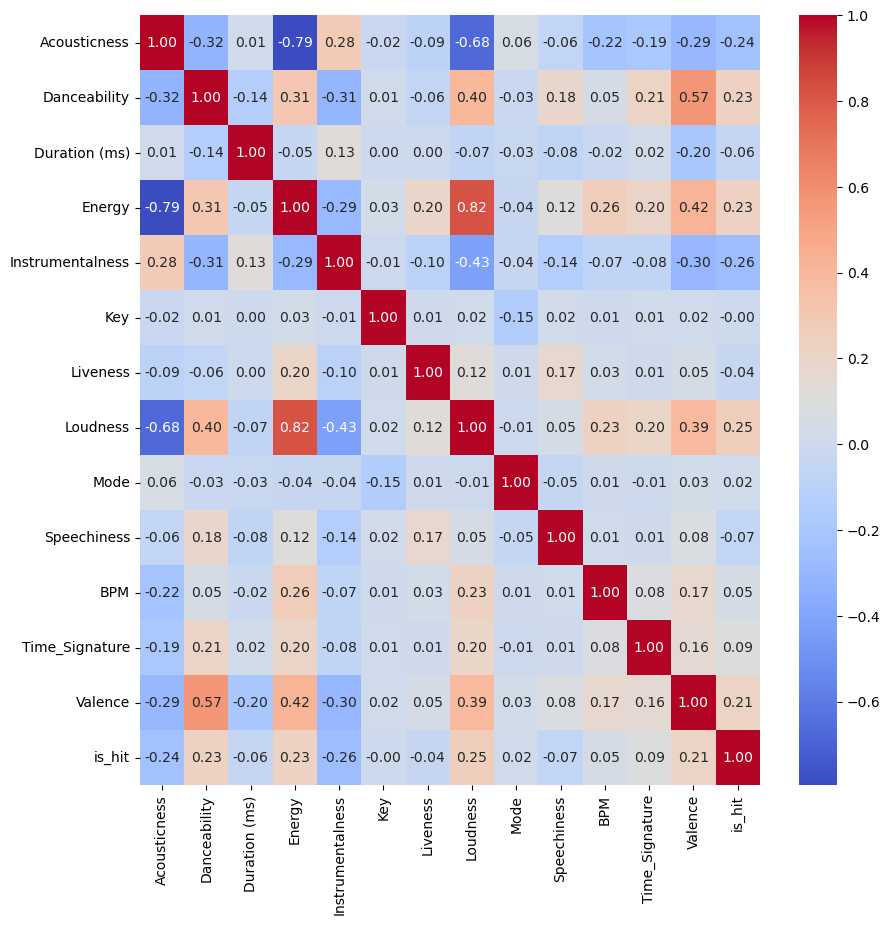

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(data4model.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

In [77]:
pipe_base = Pipeline([('scale', StandardScaler()), ('rfr', RandomForestClassifier(max_depth=7))])
X_train, X_test, y_train, y_test = train_test_split(data4model.drop(['is_hit'], axis=1) , data4model['is_hit'], test_size=.3, random_state = 31)

In [78]:
def cross_validation_pip(X_train, y_train, estimator, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list, score_val_list = [], []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
        
        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        estimator.fit(X_train_fold, y_train_fold)
        
        # now how did we do?
        score_val_list.append(precision_score(y_val_fold, estimator.predict(X_val_fold)))
        score_train_list.append(precision_score(y_train_fold, estimator.predict(X_train_fold)))
    
    return {'train_precision': np.mean(score_train_list), 'validation_precision': np.mean(score_val_list)}
cross_validation_pip(X_train, y_train, pipe_base)

{'train_precision': 0.8137418541134783,
 'validation_precision': 0.8033829792498522}

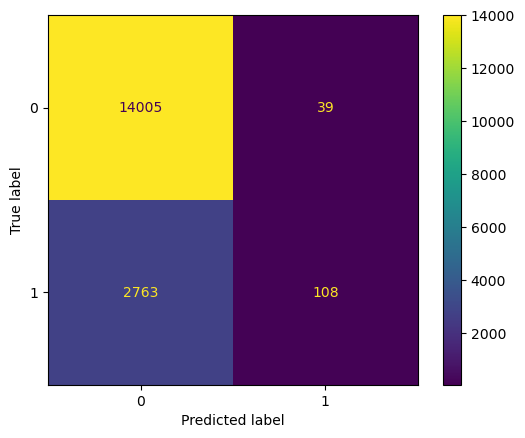

In [79]:
cfmat = confusion_matrix(y_test, pipe_base.predict(X_test))

ConfusionMatrixDisplay(cfmat).plot()

In [80]:
pipe_grid = {'rfr__max_depth': [4,5,6,7],
             'rfr__n_estimators': [x for x in range(100,251,50)]}
gs_pipe = GridSearchCV(estimator=pipe_base, 
                       param_grid=pipe_grid)

In [81]:
gs_pipe.fit(X_train, y_train);
gs_pipe.best_params_

{'rfr__max_depth': 7, 'rfr__n_estimators': 200}

In [82]:
pipe_opt = Pipeline([('scale', StandardScaler()), ('rfr', RandomForestClassifier(max_depth=7, n_estimators=200))])
X_train, X_test, y_train, y_test = train_test_split(data4model.drop(['is_hit'], axis=1) , data4model['is_hit'], test_size=.3, random_state = 31)

In [83]:
cross_validation_pip(X_train, y_train, pipe_opt)

{'train_precision': 0.8195799774162911,
 'validation_precision': 0.7943423880767347}

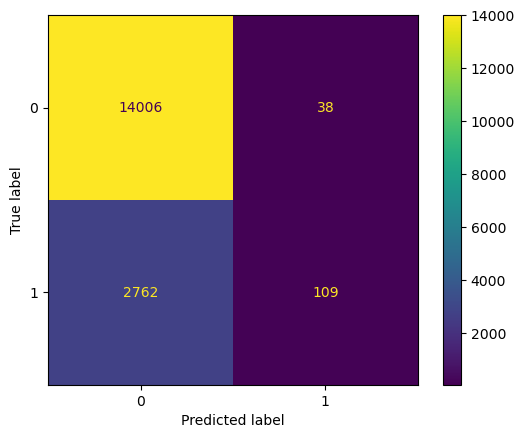

In [84]:
cfmat = confusion_matrix(y_test, pipe_opt.predict(X_test))

ConfusionMatrixDisplay(cfmat).plot()